---
title: "Group Assignment 1"
author: "Simon Yu"
date: "2025-10-01"
format: pdf
---
\newpage
\tableofcontents
\listoffigures
\listoftables
\newpage

In [584]:
library(dplyr)
library(ggplot2)
library(PerformanceAnalytics)
library(lubridate)
library(scales)

In [585]:
data <- read.csv("compustat_food_bev.csv")

# filter data for Starbucks (SBUX)
sbux_data <- filter(data, tic == "SBUX")
# filter data for Wendy's (WEN)
wen_data <- filter(data, tic == "WEN")
# filter data for Potbelly (PBPB)
pbpb_data <- filter(data, tic == "PBPB")
# filter data for Chipotle (SMG)
cmg_data <- filter(data, tic == "CMG")

## 1. Visualise the number of tickers on each exchange that have had at least one trading day with a volume of more than 100000.

# A tibble: 4 × 2
  exchg tic_num
  <int>   <int>
1    11      16
2    12       1
3    14      36
4    19       1


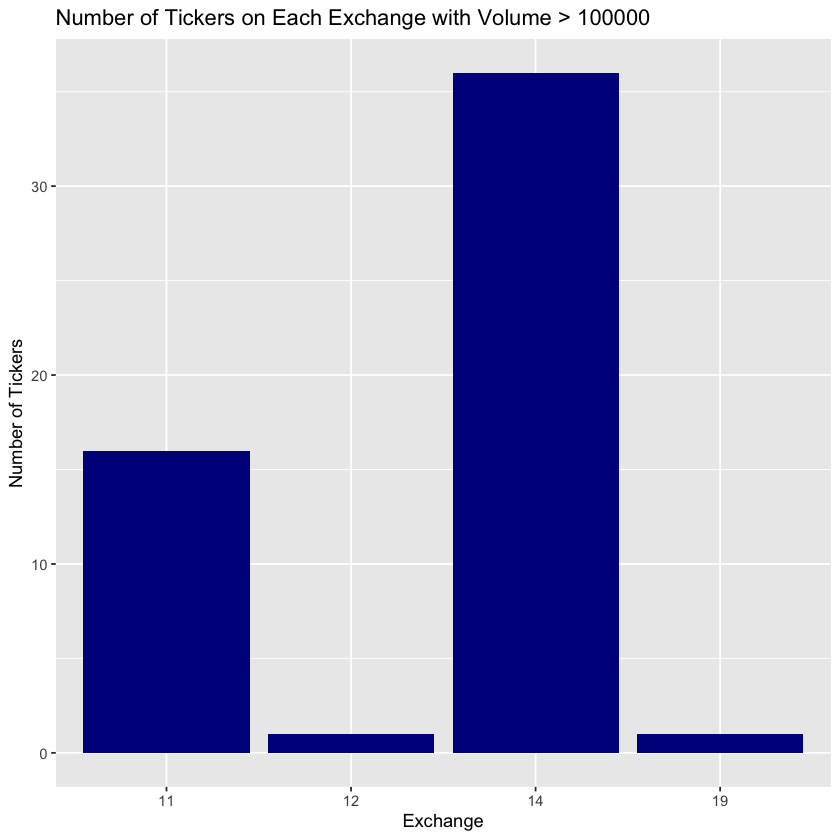

In [586]:

tickers_each_exchange <- data %>%
  filter(cshtrd > 100000) %>%
  group_by(exchg) %>%
  summarise(tic_num = n_distinct(tic))

# demonstrate the calulating result
print(tickers_each_exchange)

ggplot(tickers_each_exchange, aes(factor(exchg), tic_num)) +
  geom_col(fill = "dark blue") +
  labs(title = "Number of Tickers on Each Exchange with Volume > 100000",
       x = "Exchange", y = "Number of Tickers")

## 2. Visualize on one line plot the close prices of each ticker (SBUX, WEN, PBPB, CMG), over the period.

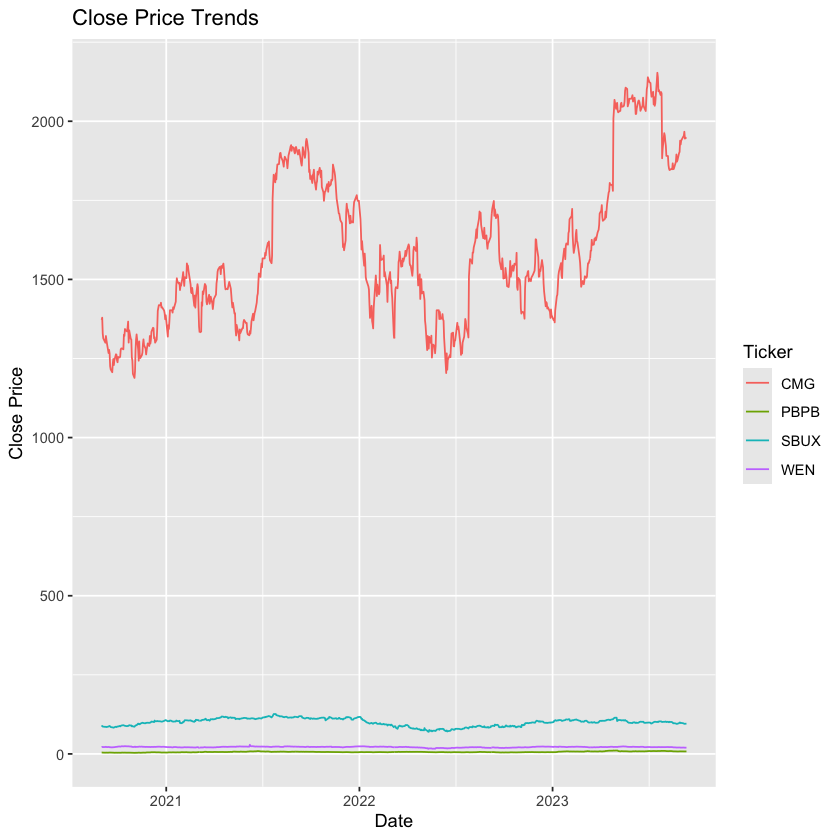

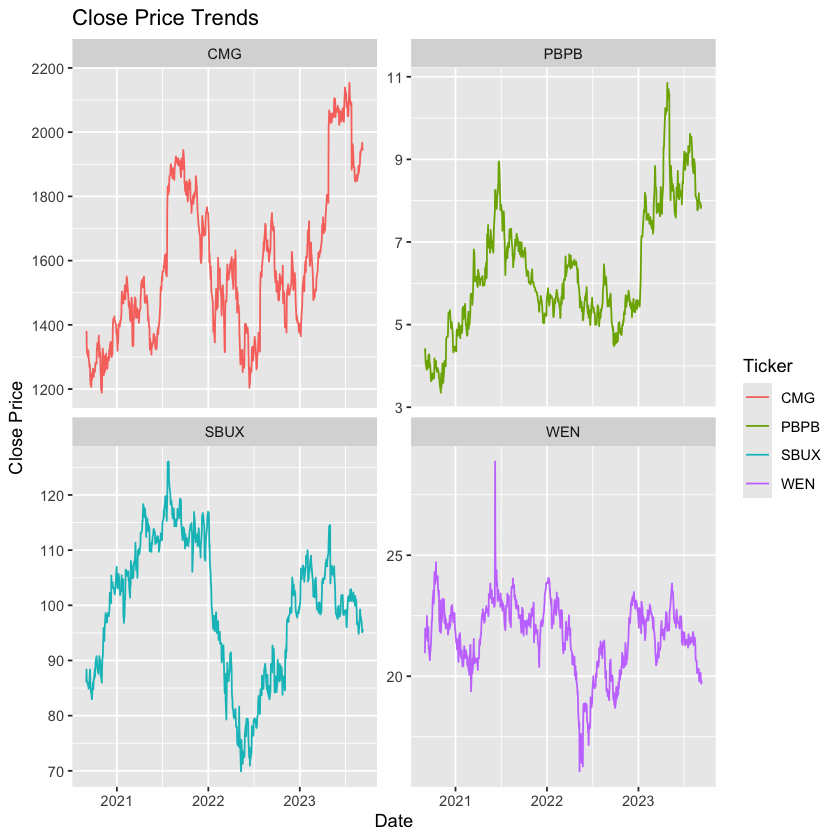

In [587]:
subset <- filter(data, tic == "SBUX" | tic == "WEN"
                 | tic == "PBPB" | tic == "CMG")
subset$datadate <- as.Date(as.character(subset$datadate), format = "%d/%m/%Y")

ggplot(subset, aes(datadate, prccd, colour = tic)) +
  geom_line() +
  labs(title = "Close Price Trends", colour = "Ticker",
       x = "Date", y = "Close Price")

# We can see that close price of CMG is far higher than
# the other three companies, making the line plot hard to read.

# Therefore, we use facet_wrap to create separate plots for
# each ticker with free y scales.
ggplot(subset, aes(datadate, prccd, colour = tic)) +
  geom_line() +
  facet_wrap(~ tic, scales = "free_y") +
  labs(title = "Close Price Trends", colour = "Ticker",
       x = "Date", y = "Close Price")

## Finally, considering only the ticker you analysed with the highest mean daily return over the period:
## 3. Visualise on one line plot the high and low prices, in the year 2021.

In [588]:
sbux_data <- mutate(sbux_data, daily_return = (prccd - lag(prccd)) / lag(prccd))
sbux_data <- filter(sbux_data, !is.na(daily_return))

wen_data <- mutate(wen_data, daily_return = (prccd - lag(prccd)) / lag(prccd))
wen_data <- filter(wen_data, !is.na(daily_return))

pbpb_data <- mutate(pbpb_data, daily_return = (prccd - lag(prccd)) / lag(prccd))
pbpb_data <- filter(pbpb_data, !is.na(daily_return))

cmg_data <- mutate(cmg_data, daily_return = (prccd - lag(prccd)) / lag(prccd))
cmg_data <- filter(cmg_data, !is.na(daily_return))

# observe mean daily return for the tickers we analyzed
sbux_mean_daily_return <- mean(sbux_data$daily_return)
wen_mean_daily_return <- mean(wen_data$daily_return)
pbpb_mean_daily_return <- mean(pbpb_data$daily_return)
cmg_mean_daily_return <- mean(cmg_data$daily_return)

print(paste("Mean Daily Returns for SBUX:", sbux_mean_daily_return))
print(paste("Mean Daily Returns for WEN:", wen_mean_daily_return))
print(paste("Mean Daily Returns for PBPB:", pbpb_mean_daily_return))
print(paste("Mean Daily Returns for CMG:", cmg_mean_daily_return))

[1] "Mean Daily Returns for SBUX: 0.000291046723931376"
[1] "Mean Daily Returns for WEN: 0.000116474712706267"
[1] "Mean Daily Returns for PBPB: 0.00127986776777774"
[1] "Mean Daily Returns for CMG: 0.000674687634951914"


Apparnetly, PBPB has the highest mean daily return among the four tickers.

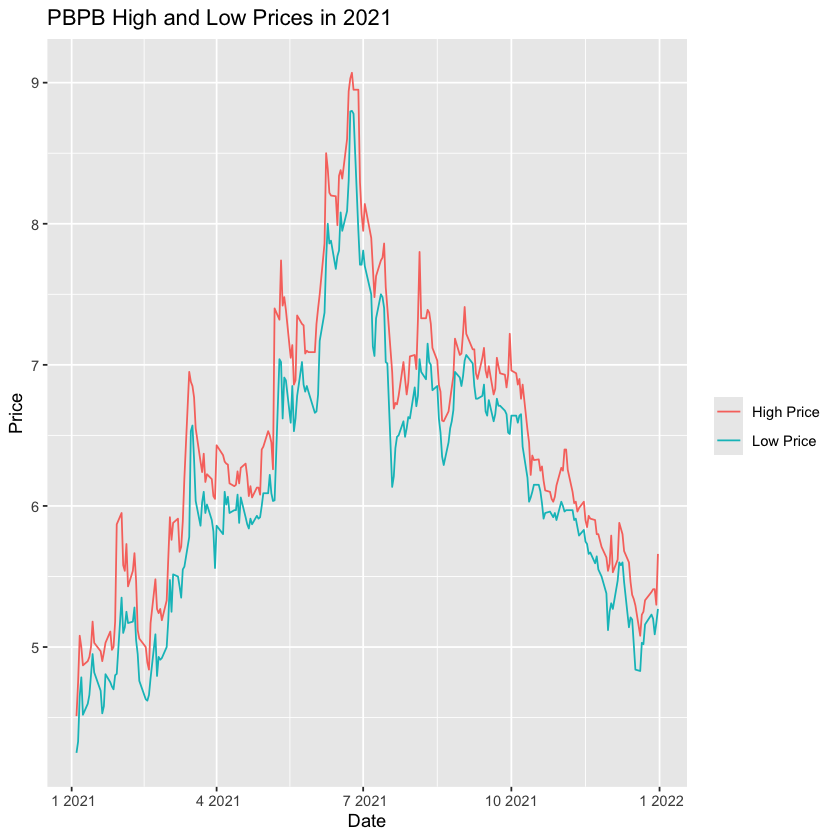

In [589]:
# PBPB high & low prices in 2021
pbpb_data$datadate <- as.Date(pbpb_data$datadate, format = "%d/%m/%Y")

# filter all the PBPB data in 2021
pbpb_data_2021 <- filter(pbpb_data, year(pbpb_data$datadate) == 2021)

# plot high and low prices
ggplot(pbpb_data_2021, aes(datadate, prchd, colour = "High Price")) +
  geom_line() +
  geom_line(aes(datadate, prcld, color = "Low Price")) +
  labs(title = "PBPB High and Low Prices in 2021",
       colour = "", x = "Date", y = "Price")

## 4. Visualise volume using a bar plot, over the entire period.

# A tibble: 4 × 2
   year   volume
  <dbl>    <int>
1  2020 12339320
2  2021 28658498
3  2022  9150412
4  2023 32188643


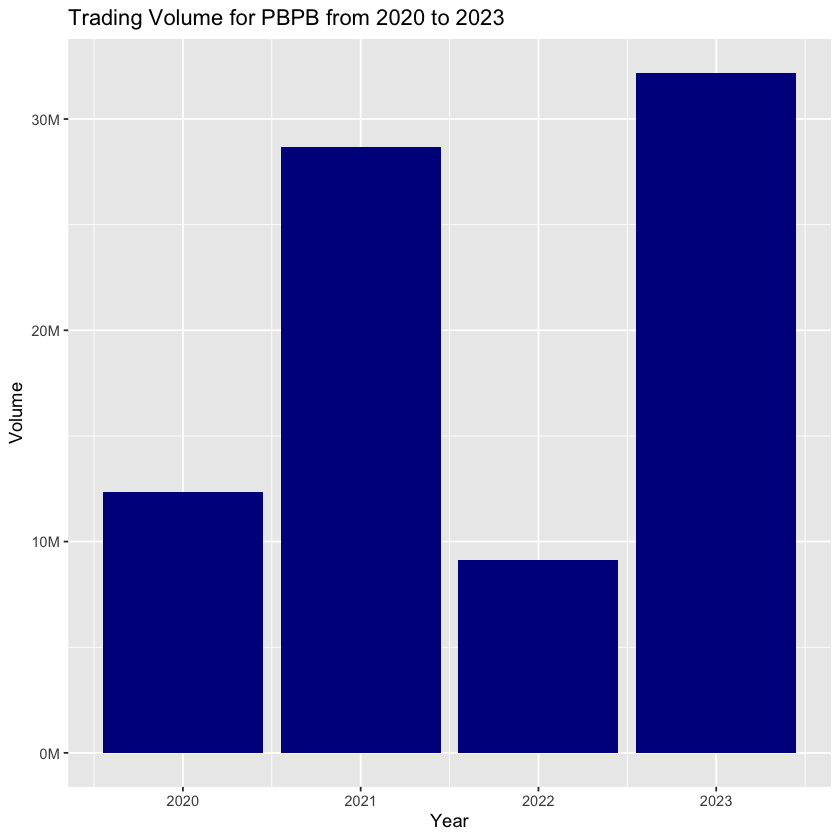

In [590]:
pbpb_data <- mutate(pbpb_data, year = year(datadate))

annual_volume <- pbpb_data %>%
  mutate(year = year(datadate)) %>%
  group_by(year) %>%
  summarise(volume = sum(cshtrd))

print(annual_volume)

# Plot on a bar graph
ggplot(annual_volume, aes(year, volume)) +
  geom_col(fill = "dark blue") +
  scale_y_continuous(labels = label_number(scale = 1e-6, suffix = "M")) +
  labs(x = "Year", y = "Volume",
       title = "Trading Volume for PBPB from 2020 to 2023")

## 5. Visualise, using a scatter (point) plot, the relationship between simple daily returns and volume, in the year 2021.

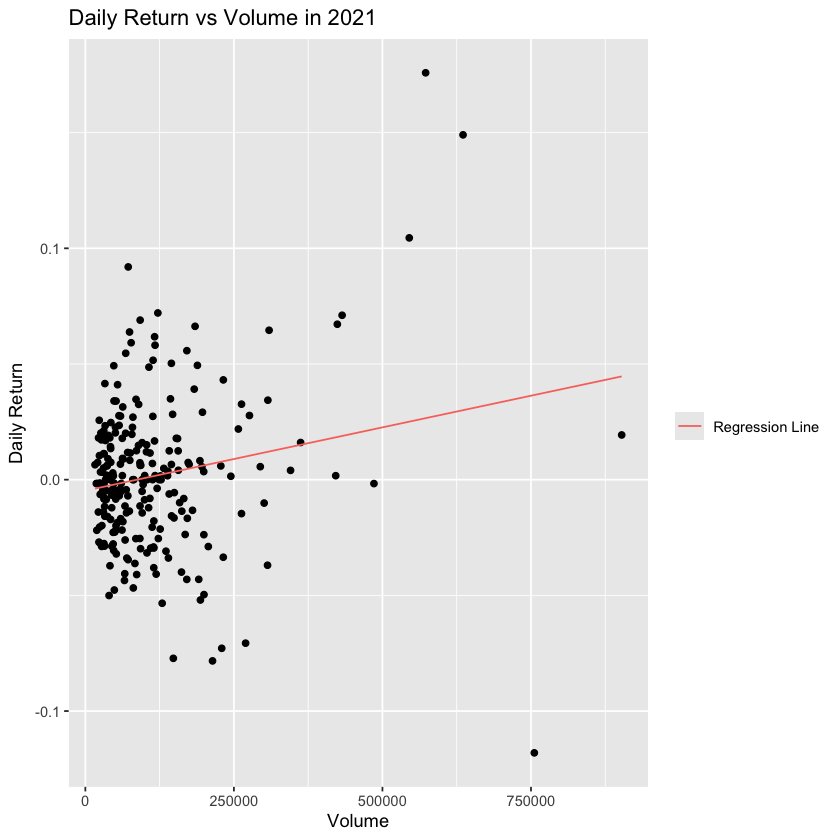

In [591]:
lm_return_volume  <- lm(formula = daily_return ~ cshtrd, data = pbpb_data_2021)

pbpb_data_2021$model <- predict(lm_return_volume)

# Plot a scatter plot
ggplot(pbpb_data_2021, aes(cshtrd, daily_return)) +
  geom_point() +
  geom_line(aes(y = model, colour = "Regression Line")) +
  labs(title = "Daily Return vs Volume in 2021",
       colour = "", x = "Volume", y = "Daily Return")